>Họ tên: Phùng Dũng Quân\
>MSSV: 22280073

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hàm đạo hàm của hàm sigmoid
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Hàm khởi tạo trọng số
def generate_weights_biases(num_in_features, num_out_features):
    np.random.seed(0)
    weights = np.random.rand(num_in_features, num_out_features)
    return weights

# Chuẩn bị dữ liệu
x_mau = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])
y_mau = np.array([[0], [1], [1], [0]])

# Thiết lập tham số mạng nơ-ron
n_hidden_nodes = 4
learning_rate = 0.5
max_iterations = 10000

# Accelerated Gradient Descent

Epoch 0, Loss: 0.948715
Epoch 1000, Loss: 0.000369
Epoch 2000, Loss: 0.000162
Epoch 3000, Loss: 0.000133
Epoch 4000, Loss: 0.000120
Epoch 5000, Loss: 0.000111
Epoch 6000, Loss: 0.000103
Epoch 7000, Loss: 0.000096
Epoch 8000, Loss: 0.000090
Epoch 9000, Loss: 0.000084
Input: [0 0], Dự đoán: 0, Xác suất: 0.0003
Input: [1 0], Dự đoán: 1, Xác suất: 1.0000
Input: [0 1], Dự đoán: 1, Xác suất: 1.0000
Input: [1 1], Dự đoán: 0, Xác suất: 0.0000


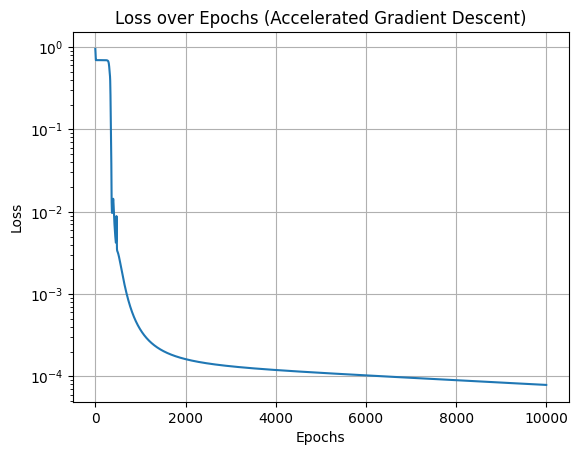

In [76]:
def XOR_train_AGD(x_mau, y_mau, max_iterations, learning_rate):
    N = x_mau.shape[0]
    ones_column = np.ones((N, 1))
    x_in = np.hstack((ones_column, x_mau)).T
    y_target = y_mau.T
    
    # --- KHỞI TẠO TRỌNG SỐ VỚI KÍCH THƯỚC ĐÚNG ---
    w1 = generate_weights_biases(3, x_in.shape[0])
    w2 = generate_weights_biases(3, 3)
    w3 = generate_weights_biases(1, 3)

    # Khởi tạo các biến vận tốc
    v_w1 = np.zeros_like(w1)
    v_w2 = np.zeros_like(w2)
    v_w3 = np.zeros_like(w3)

    losses = []
    for i in range(max_iterations):
        gamma = (i - 1) / (i + 2)

        # Initialize weights
        w1 = w1 - gamma * v_w1
        w2 = w2 - gamma * v_w2
        w3 = w3 - gamma * v_w3

        # --- FORWARD PASS
        n1 = np.dot(w1, x_in)
        H1 = sigmoid(n1)
        
        n2 = np.dot(w2, H1)
        H2 = sigmoid(n2)

        n3 = np.dot(w3, H2)
        H3 = sigmoid(n3)
        
        # Tính toán loss
        loss = -np.mean(y_target * np.log(H3) + (1 - y_target) * np.log(1 - H3))
        losses.append(loss)
        
        # --- BACKWARD PASS ---
        delta3 = (H3 - y_target) * sigmoid_derivative(n3)
        dw3 = np.dot(delta3, H2.T) / N

        delta2 = np.dot(w3.T, delta3) * sigmoid_derivative(n2)
        dw2 = np.dot(delta2, H1.T) / N

        delta1 = np.dot(w2.T, delta2) * sigmoid_derivative(n1)
        dw1 = np.dot(delta1, x_in.T) / N

        # --- CẬP NHẬT VẬN TỐC VÀ TRỌNG SỐ ---
        v_w1 = (gamma * v_w1) + (learning_rate * dw1)
        v_w2 = (gamma * v_w2) + (learning_rate * dw2)
        v_w3 = (gamma * v_w3) + (learning_rate * dw3)

        w1 -= v_w1
        w2 -= v_w2
        w3 -= v_w3

        if i % 1000 == 0:
            print(f"Epoch {i}, Loss: {loss:.6f}")
            
    final_probs = H3.T
    final_preds = np.round(final_probs)

    return final_probs, final_preds, losses

output_probs, predictions, loss_history = XOR_train_AGD(
    x_mau, y_mau,  max_iterations, learning_rate
)

for i in range(len(x_mau)):
    print(f"Input: {x_mau[i]}, Dự đoán: {int(predictions[i][0])}, Xác suất: {output_probs[i][0]:.4f}")

# --- VẼ ĐỒ THỊ LOSS ---
plt.plot(loss_history)
plt.title("Loss over Epochs (Accelerated Gradient Descent)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.yscale('log')
plt.show()

# Stochastic Gradient Descent

Epoch 0, Loss: 0.9463
Epoch 1000, Loss: 0.7012
Epoch 2000, Loss: 0.6922
Epoch 3000, Loss: 0.1621
Epoch 4000, Loss: 0.0361
Epoch 5000, Loss: 0.0242
Epoch 6000, Loss: 0.0191
Epoch 7000, Loss: 0.0161
Epoch 8000, Loss: 0.0141
Epoch 9000, Loss: 0.0127
Input: [0 0], Dự đoán: 0, Xác Suất: 0.0121
Input: [1 0], Dự đoán: 1, Xác Suất: 0.9884
Input: [0 1], Dự đoán: 1, Xác Suất: 0.9883
Input: [1 1], Dự đoán: 0, Xác Suất: 0.0106


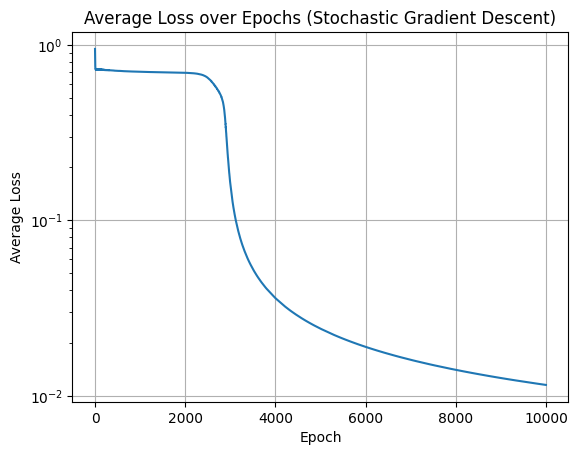

In [77]:
def XOR_train_SGD(x_mau, y_mau, max_iterations, learning_rate):
    N = x_mau.shape[0]  # Number of samples
    
    # Thêm cột bias vào x_mau và chuyển vị
    ones_column = np.ones((N, 1))
    x_in = np.hstack((ones_column, x_mau)).T  # (num_features + 1, N)
    num_in_feature_incl_bias = x_in.shape[0] # Number of input features including bias
    y_target = y_mau.T  # Transpose y_mau to match the shape of output layer
    num_hidden_nodes = 3 # Number of nodes in each hidden layer

    # Initialize weights
    w1 = generate_weights_biases(num_hidden_nodes, num_in_feature_incl_bias)
    w2 = generate_weights_biases(num_hidden_nodes, num_hidden_nodes)
    w3 = generate_weights_biases(1, num_hidden_nodes)

    losses = [] # To store the loss of the last epoch

    for epoch in range(max_iterations):
        
        # --- THAY ĐỔI: Xáo trộn dữ liệu ở đầu mỗi epoch ---
        # Đây là bước quan trọng trong SGD để tránh việc mô hình học thứ tự của dữ liệu
        permutation = np.random.permutation(N)
        x_shuffled = x_mau[permutation]
        y_shuffled = y_mau[permutation]
        
        current_epoch_loss = 0

        # --- THAY ĐỔI: Vòng lặp qua TỪNG mẫu dữ liệu ---
        for i in range(N):
            # Lấy ra một mẫu duy nhất
            x_sample = x_shuffled[i]
            y_target_sample = y_shuffled[i]

            # Thêm bias và định hình lại để tính toán (reshape to column vector)
            x_in = np.hstack(([1], x_sample)).reshape(-1, 1)

            # --- FORWARD PASS cho một mẫu ---
            n1 = np.dot(w1, x_in)
            H1 = sigmoid(n1)
            
            n2 = np.dot(w2, H1)
            H2 = sigmoid(n2)

            n3 = np.dot(w3, H2)
            H3 = sigmoid(n3)

            # Tính loss cho mẫu hiện tại và cộng dồn
            loss = -np.mean(y_target_sample * np.log(H3) + (1 - y_target_sample) * np.log(1 - H3))
            current_epoch_loss += loss

            # --- BACKPROPAGATION cho một mẫu ---
            # Delta cho output layer
            delta3 = (H3 - y_target_sample) * sigmoid_derivative(n3)
            dw3 = np.dot(delta3, H2.T)

            # Delta cho hidden layer 2
            delta2 = np.dot(w3.T, delta3) * sigmoid_derivative(n2)
            dw2 = np.dot(delta2, H1.T)

            # Delta cho hidden layer 1
            delta1 = np.dot(w2.T, delta2) * sigmoid_derivative(n1)
            dw1 = np.dot(delta1, x_in.T)
            
            # --- CẬP NHẬT TRỌNG SỐ ngay sau mỗi mẫu ---
            # Lưu ý: Không còn chia cho N nữa
            w3 -= learning_rate * dw3
            w2 -= learning_rate * dw2
            w1 -= learning_rate * dw1
        
        # Ghi lại loss trung bình của epoch
        losses.append(current_epoch_loss / N)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {current_epoch_loss / N:.4f}")
    
    # --- DỰ ĐOÁN KẾT QUẢ CUỐI CÙNG ---
    # Chạy forward pass trên toàn bộ dữ liệu để có kết quả cuối cùng
    ones_column = np.ones((N, 1))
    x_full_in = np.hstack((ones_column, x_mau)).T
    
    n1 = np.dot(w1, x_full_in)
    H1 = sigmoid(n1)
    n2 = np.dot(w2, H1)
    H2 = sigmoid(n2)
    n3 = np.dot(w3, H2)
    H3 = sigmoid(n3)
    
    final_output_probs = H3.T
    final_predictions = np.round(final_output_probs)
    
    return final_output_probs, final_predictions, losses

output_probs, predictions, losses = XOR_train_SGD(
    x_mau, y_mau, max_iterations, learning_rate
)

for i in range(x_mau.shape[0]):
    print(f"Input: {x_mau[i]}, Dự đoán: {int(predictions[i][0])}, Xác Suất: {output_probs[i][0]:.4f}")

# Vẽ đồ thị loss
plt.plot(losses)
plt.title("Average Loss over Epochs (Stochastic Gradient Descent)")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid(True)
plt.yscale('log')
plt.show()

In [78]:
import pandas as pd

df = pd.read_csv('bang_gia_nha.csv')
X = df[['Dien tich (m2)', 'So phong ngu', 'Khoang cach toi TT']]
y = df['Gia (ty VND)']

In [79]:
def train_NN_AGD_Regression(X_df, y_series, max_iterations, learning_rate):
    x_mau = X_df
    y_target = y_series.values.reshape(1, -1)
    N = x_mau.shape[0]
    num_features = x_mau.shape[1]
    ones_column = np.ones((N, 1))
    x_in = np.hstack((ones_column, x_mau)).T
    neurons_H1 = 5
    w1 = generate_weights_biases(neurons_H1, x_in.shape[0])
    neurons_H2 = 5
    w2 = generate_weights_biases(neurons_H2, neurons_H1 + 1) 
    w_out = generate_weights_biases(1, neurons_H2 + 1)
    v_w1 = np.zeros_like(w1)
    v_w2 = np.zeros_like(w2)
    v_w_out = np.zeros_like(w_out)
    losses = []
    for i in range(max_iterations):
        gamma = (i - 1) / (i + 2)
        w1_ahead = w1 - gamma * v_w1
        w2_ahead = w2 - gamma * v_w2
        w_out_ahead = w_out - gamma * v_w_out
        n1 = np.dot(w1_ahead, x_in)
        H1 = sigmoid(n1)
        H1_with_bias = np.vstack((np.ones((1, H1.shape[1])), H1))
        n2 = np.dot(w2_ahead, H1_with_bias)
        H2 = sigmoid(n2)
        H2_with_bias = np.vstack((np.ones((1, H2.shape[1])), H2))
        n_out = np.dot(w_out_ahead, H2_with_bias)
        H_out = n_out 
        loss = np.mean((H_out - y_target)**2)
        losses.append(loss)     
        delta_out = (H_out - y_target) 
        dw_out = np.dot(delta_out, H2_with_bias.T) / N
        delta2_raw = np.dot(w_out_ahead.T, delta_out) 
        delta2 = delta2_raw[1:, :] * sigmoid_derivative(n2) 
        dw2 = np.dot(delta2, H1_with_bias.T) / N
        delta1_raw = np.dot(w2_ahead.T, delta2) 
        delta1 = delta1_raw[1:, :] * sigmoid_derivative(n1) 
        dw1 = np.dot(delta1, x_in.T) / N
        v_w1 = (gamma * v_w1) + (learning_rate * dw1)
        v_w2 = (gamma * v_w2) + (learning_rate * dw2)
        v_w_out = (gamma * v_w_out) + (learning_rate * dw_out)
        w1 -= v_w1
        w2 -= v_w2
        w_out -= v_w_out      
    final_predictions = H_out.T   
    return w1, w2, w_out, final_predictions, losses

# --- Hàm dự đoán mới cho HỒI QUY ---
def predict_NN_AGD_Regression(X_new_df, w1, w2, w_out):
    N_new = X_new_df.shape[0]
    ones_column = np.ones((N_new, 1))
    x_new_in = np.hstack((ones_column, X_new_df)).T
    n1 = np.dot(w1, x_new_in)
    H1 = sigmoid(n1)
    H1_with_bias = np.vstack((np.ones((1, H1.shape[1])), H1))
    n2 = np.dot(w2, H1_with_bias)
    H2 = sigmoid(n2)
    H2_with_bias = np.vstack((np.ones((1, H2.shape[1])), H2))
    n_out = np.dot(w_out, H2_with_bias)
    H_out = n_out   
    return H_out.T

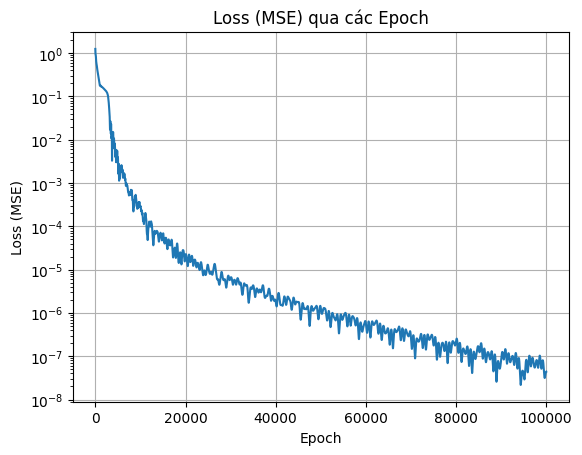


--- Dự đoán giá nhà cho một mẫu dữ liệu HOÀN TOÀN MỚI ---
Dữ liệu nhà mới:
{'Dien tich (m2)': 79.0, 'So phong ngu': 2.0, 'Khoang cach toi TT': 26.5}
Giá nhà dự đoán: 3.37


In [80]:
from sklearn.preprocessing import StandardScaler
X_normalized = StandardScaler().fit_transform(X)
w1_trained, w2_trained, w_out_trained, final_preds_train, losses_train = train_NN_AGD_Regression(X_normalized, y, 100000, 0.01)

plt.plot(losses_train)
plt.title('Loss (MSE) qua các Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.yscale('log')
plt.show()

# Dự đoán trên một mẫu dữ liệu hoàn toàn mới, chưa từng thấy
print("\n--- Dự đoán giá nhà cho một mẫu dữ liệu HOÀN TOÀN MỚI ---")
new_house_data = pd.DataFrame(
    [[79, 2, 26.5]],
    columns=X.columns
)
predicted_new_price = predict_NN_AGD_Regression(new_house_data, w1_trained, w2_trained, w_out_trained)
print(f"Dữ liệu nhà mới:\n{new_house_data.iloc[0].to_dict()}")
print(f"Giá nhà dự đoán: {predicted_new_price.flatten()[0]:.2f}")